# Where Should I Get My Driver's License?

In this project, I'll analyze the best driving school for me to take my driver's license in 2022 based on the three parameters below:

1. Approval rate on the driving test (Car category only)
2. Distance from home
3. Cost

I retrieved the data from the DETRAN website on 09/27/2022. You can access their reports on https://www.detran.sp.gov.br/wps/portal/portaldetran/parceiros/cfc/pesquisacfc.

PS: DETRAN-SP stands for Departamento Estadual de Trânsito de São Paulo (São Paulo State Department of Traffic). It is the entity responsible for ruling the traffic and issuing driver's licenses.

In [6]:
import pandas as pd
import pyautogui as pag
import time
import pyperclip as pc

In [16]:
time.sleep(10)
pag.position()

Point(x=2324, y=642)

In [17]:
pag.PAUSE=1
#open new tab
pag.hotkey('ctrl','t')
#write link
link = pc.copy('https://www.detran.sp.gov.br/wps/portal/portaldetran/parceiros/cfc/pesquisacfc')
pag.hotkey('ctrl', 'v')
#press enter
pag.press('enter')
time.sleep(5)


#click on the screen
pag.click(x=2455, y=657)

#press down a couple times
for i in range(0,10):
    pag.press('down')

#click 1
pag.click(x=2377, y=443)
time.sleep(5)

#click 2
pag.click(x=2246, y=553)
time.sleep(5)

#dowload
pag.click(x=2324, y=642)

In [2]:
df = pd.read_csv('relatorioTotalAprovadosReprovadosHistoricoCFC.csv', sep=';', encoding = 'iso8859-1')
df.head()

,idcfc,nome do cfc,cnpj,ciretran,ano,aprovados,reprovados,% de aprovados,% de reprovados,total,tipo
0,12222,AMEL CENTRO DE FORMACAO DE CONDUTORES LTDA ME,6.327232e+12,CIR-BADY BASSIT,2016,261,89,74%,25%,350,teórico
1,10402,AMEL CENTRO DE FORMACAO DE CONDUTORES LTDA ME,0.000000e+00,CIR-NOVO HORIZONTE,2016,2,0,100%,0%,2,teórico
2,11823,AUTO ESCOLA ANGATUBA LTDA ME,5.897768e+13,CIR-ANGATUBA,2016,314,127,71%,28%,441,teórico
3,11200,AUTO ESCOLA AURIFLAMA,3.368647e+12,CIR-AURIFLAMA,2016,219,57,79%,20%,276,teórico
4,11333,AUTO ESCOLA AVENIDA BURITAMA LTDA,3.580728e+12,CIR-BURITAMA,2016,206,95,68%,31%,301,teórico


1. Taxa de aprovação na categoria B

In [3]:
# filtrando por tipo
df = df[df.tipo == 'prático - categoria B ']
df.tail()

,idcfc,nome do cfc,cnpj,ciretran,ano,aprovados,reprovados,% de aprovados,% de reprovados,total,tipo
70158,370248,A M ESCOLA BARROS,9.650655e+13,CIR-RIO CLARO,2022,86,39,68%,31%,125,prático - categoria B
70163,310248,A M E PARATI II,9.650678e+13,CIR-RIO CLARO,2022,172,109,61%,38%,281,prático - categoria B
70165,642082,AUTO ESCOLA WILSON,9.754589e+13,POUPATEMPO/CIRETRAN-HORTOLANDIA,2022,322,260,55%,44%,582,prático - categoria B
70168,880437,CFC ABILIO E ABILO,9.754837e+13,CIR-MOCOCA,2022,104,41,71%,28%,145,prático - categoria B
70171,1001515,A E SUPREMA,9.755011e+13,CIR-TABOAO DA SERRA,2022,227,93,70%,29%,320,prático - categoria B


In [4]:
# corrigindo as %s

df['taxa_aprovacao'] = df['aprovados']/df['total']
df.head()

,idcfc,nome do cfc,cnpj,ciretran,ano,aprovados,reprovados,% de aprovados,% de reprovados,total,tipo,taxa_aprovacao
2222,1000010,AUTOESCOLA LEAO,0.0,POUPATEMPO/CIRETRAN-ARARAQUARA,2016,23,11,67%,32%,34,prático - categoria B,0.676471
2225,1540031,CFC ATUAL,0.0,CIR-BAURU,2016,163,55,74%,25%,218,prático - categoria B,0.747706
2227,760101,,0.0,CIR-RIBEIRAO PRETO,2016,10,6,62%,37%,16,prático - categoria B,0.625000
2229,130115,CFC ATIQUE,0.0,CIR-SAO JOSE DO RIO PRETO,2016,59,35,62%,37%,94,prático - categoria B,0.627660
2231,340115,CFC CENTROCON,0.0,CIR-SAO JOSE DO RIO PRETO,2016,1964,982,66%,33%,2946,prático - categoria B,0.666667


Vou analisar as taxas de aprovação nos seguintes cenários:

1. taxas gerais desde 2016
2. taxas ano a ano
3. taxas dentro do ciretran mais próximo (DET-ARMÊNIA)
4. taxas em 2022

In [5]:
# taxa geral desde 2016
df['taxa_aprovacao'].describe()

count    20950.000000
mean         0.610299
std          0.126603
min          0.000000
25%          0.533333
50%          0.602740
75%          0.680262
max          1.000000
Name: taxa_aprovacao, dtype: float64

<AxesSubplot:>

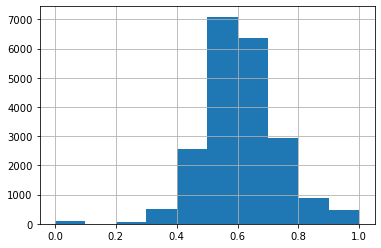

In [6]:
df['taxa_aprovacao'].hist()

In [7]:
# taxa de aprovação geral ano após ano
df.groupby('ano').describe()['taxa_aprovacao']

,count,mean,std,min,25%,50%,75%,max
ano,,,,,,,,
2016,3242.0,0.580697,0.147839,0.0,0.489744,0.572678,0.666468,1.0
2017,3071.0,0.573987,0.128454,0.0,0.495188,0.566234,0.647059,1.0
2018,3022.0,0.606454,0.119809,0.0,0.532727,0.595608,0.670530,1.0
2019,2968.0,0.619000,0.118555,0.0,0.546974,0.606309,0.679265,1.0
2020,2869.0,0.630342,0.117394,0.0,0.561960,0.625984,0.693694,1.0
2021,2899.0,0.639457,0.119442,0.0,0.562550,0.629268,0.708831,1.0
2022,2879.0,0.628101,0.112863,0.0,0.553191,0.616142,0.690865,1.0


In [8]:
# taxa DET-ARMÊNIA desde 2016
df[df['ciretran'] == 'DET-ARMÊNIA']['taxa_aprovacao'].describe()

count    1521.000000
mean        0.580508
std         0.105936
min         0.000000
25%         0.524051
50%         0.580952
75%         0.628319
max         1.000000
Name: taxa_aprovacao, dtype: float64

<AxesSubplot:>

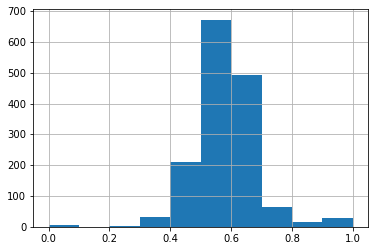

In [10]:
df[df['ciretran'] == 'DET-ARMÊNIA']['taxa_aprovacao'].hist()

In [13]:
# Taxa de aprovação Detran Armênia ano após ano
df[df['ciretran'] == 'DET-ARMÊNIA'].groupby('ano').describe()['taxa_aprovacao']

,count,mean,std,min,25%,50%,75%,max
ano,,,,,,,,
2016,252.0,0.541348,0.155494,0.000000,0.471877,0.517081,0.586809,1.000000
2017,221.0,0.534539,0.099924,0.000000,0.483516,0.531507,0.585526,1.000000
2018,217.0,0.578782,0.099878,0.000000,0.524051,0.572555,0.627010,1.000000
2019,211.0,0.586435,0.074866,0.424552,0.544568,0.586907,0.623500,1.000000
2020,206.0,0.606730,0.078514,0.285714,0.565453,0.608054,0.646387,1.000000
2021,208.0,0.617812,0.081322,0.285714,0.579587,0.612519,0.653492,0.961538
2022,206.0,0.609584,0.081493,0.263889,0.569978,0.600238,0.642601,1.000000


array([[<AxesSubplot:title={'center':'2016'}>,
        <AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>],
       [<AxesSubplot:title={'center':'2019'}>,
        <AxesSubplot:title={'center':'2020'}>,
        <AxesSubplot:title={'center':'2021'}>],
       [<AxesSubplot:title={'center':'2022'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

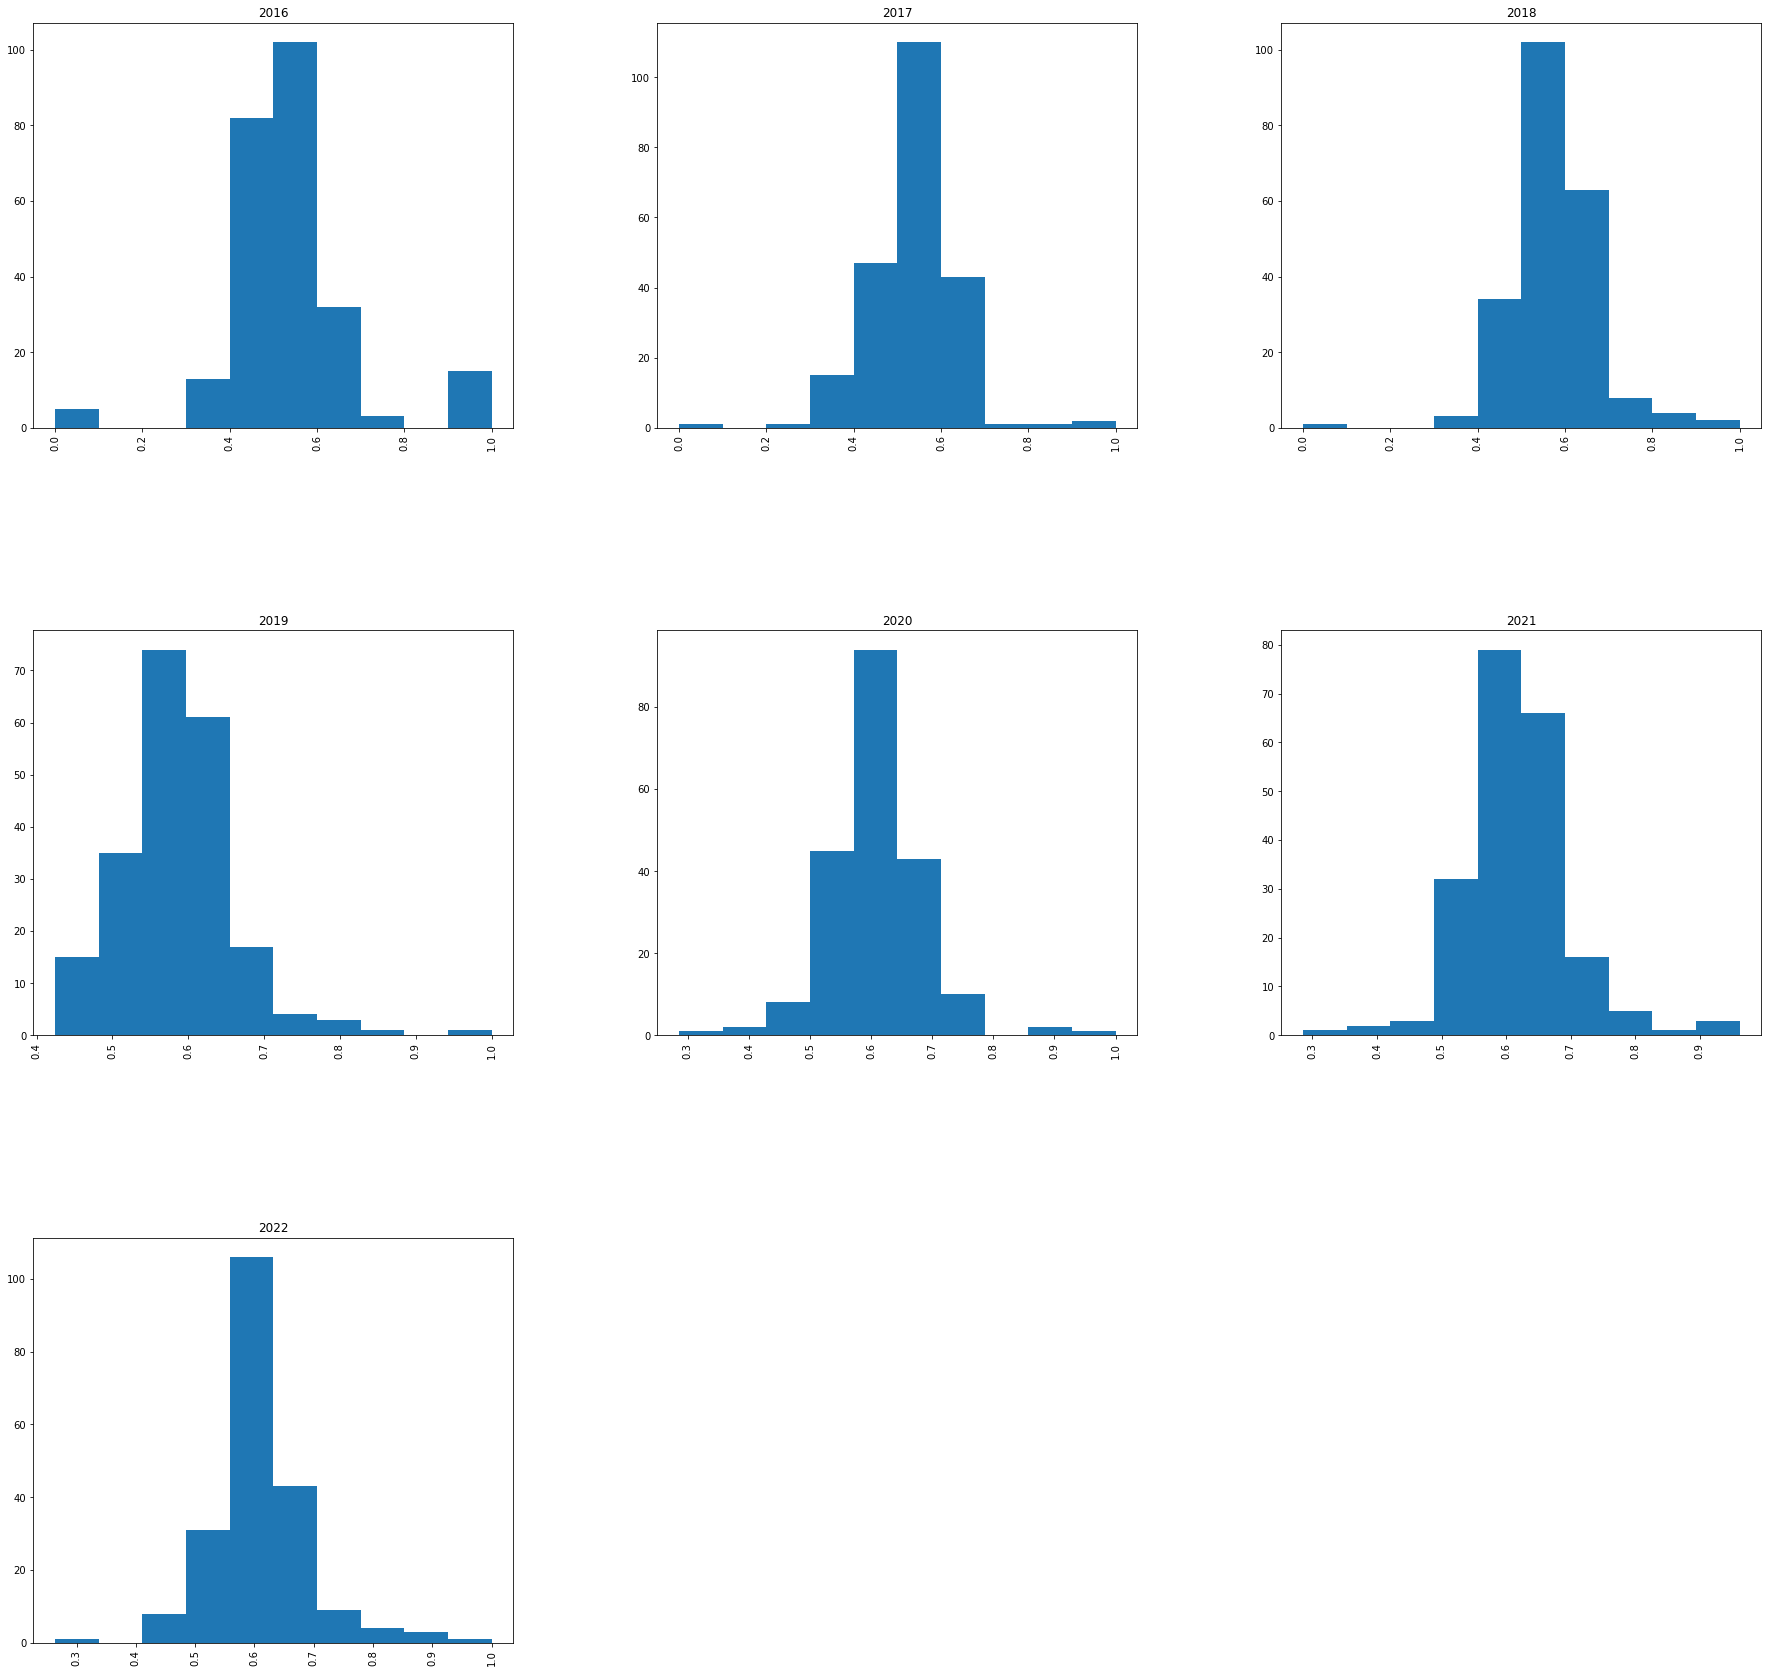

In [30]:
df[df['ciretran'] == 'DET-ARMÊNIA'].hist(column = 'taxa_aprovacao', by='ano', figsize=(30,30))

Até aqui, vemos que:
* Historicamente as taxas tem aumentado ao longo do tempo, mas as taxas do Detran Armênia são geralmente inferiores ao resto do Detran São Paulo. 
* Ainda que a maioria das autoesolas consigam aprovar pelo menos metade dos seus alunos, parece-me que devo escolher autoescolas que tenham taxa de no mínimo 60% - parâmetro dado pela média ou mediana. 

In [14]:
#Selecionando as escolas que atendem o primeiro critério (60% ou mais de aprovação) dentro da minha região
escolas = df.loc[(df['ciretran'] == 'DET-ARMÊNIA') & (df['ano'] == 2022) & (df['taxa_aprovacao'] >= .6),
                 ['idcfc', 'nome do cfc']]
escolas.drop_duplicates('idcfc', inplace = True)
escolas['nome do cfc'].unique()

array(['                    ', 'CFC NOVA ERA        ',
       'KATIVA              ', 'VILA TEREZINHA      ',
       'AUTOESCOLA ANNE     ', 'DOIS IRMAOS         ',
       'CRIATIVA            ', 'CFC ABSOLUTA        ',
       'ADVANCE             ', 'CFC BORGES          ',
       'LIRA                ', 'CFC JB              ',
       'AUTOESCOLA EUZEBIO  ', 'CFC PINHEIROS       ',
       'A E NATIVA          ', 'A E DECISAO         ',
       'CFC DREAMS S/C LTDA ', 'AUTO ESCOLA JARAGUA ',
       'GARRA               ', 'AE BRAMFUR          ',
       'CFC NOVO ESTILO     ', 'A.E. FIRENZE        ',
       'AME GR              ', 'AUTOESCOLA ABSOLUTA ',
       'CFC FIORELLI        ', 'AME SOUZA           ',
       'AME FORTALEZA       ', 'CFC BENELI          ',
       'AUOTESCOLA TOPO     ', 'AE NOVA AMERICO     ',
       'AUTOESCOLA VIANA    ', 'AUTOESCOLA VITAL    ',
       'S&S AUTO ESCOLA     ', 'CFC PIRITUBA        ',
       'CFC SARAH           ', 'ARAM                ',
       'CF

2. Localização

In [15]:
df_local = pd.read_csv('relatorioListaTodosCFC.csv', sep=';', encoding = 'iso8859-1')
df_local.head()

,IdCFC,Situacao,Média Aprovados,NomeFantasia,RazaoSocial,CNPJ,Endereco,Número,Bairro,Municipio,...,Simulador,Média das avaliações: item Ensino,Média das avaliações: item Transparência,Média das avaliações: item Instalações,Média das avaliações: item Atendimento,Média das avaliações: item Agenda,Média das avaliações: item Preço,Média das avaliações: item Localização,Quantidade de avaliações,Nota média das avaliações
0,3580045,Bloqueado,0,********,Auto Escola Lideranca Ltda,6120394000106,Av Andrade Neves,150,Centro,Campinas,...,Nao,--,--,--,--,--,--,--,0,--
1,1120493,Baixada,0,3 Irmaos,Cfc B Auto Moto Escola 3 Irmaos Ltda Me,0,Rua Votorantim,277,Barcelona,Sao Caetano Do Sul,...,Sim,--,--,--,--,--,--,--,0,--
2,191935,Bloqueado,0,500 Milhas,Centro De Formacao De Condutores 500milhas Ltd...,7936100000254,Av Dr Jose Benetti,218,Centro,Piacatu,...,Nao,--,--,--,--,--,--,--,0,--
3,8291935,Baixada,0,500 Milhas,Centro De Formacao De Condutores,0,Av Dr Jose Benetti,218,Centro,Piacatu,...,Sim,--,--,--,--,--,--,--,0,--
4,550661,Bloqueado,0,9 De Julho,Cfc 9 De Julho Ltda Me,2242144000180,Av Sao Geronimo,1140,Sao Domingos,Americana,...,Nao,--,--,--,--,--,--,--,0,--


In [16]:
df_local = df_local[df_local['IdCFC'].isin(escolas['idcfc'])]
df_local.tail()

,IdCFC,Situacao,Média Aprovados,NomeFantasia,RazaoSocial,CNPJ,Endereco,Número,Bairro,Municipio,...,Simulador,Média das avaliações: item Ensino,Média das avaliações: item Transparência,Média das avaliações: item Instalações,Média das avaliações: item Atendimento,Média das avaliações: item Agenda,Média das avaliações: item Preço,Média das avaliações: item Localização,Quantidade de avaliações,Nota média das avaliações
6615,34330122,Credenciado,65,S&s Auto Escola,Cfc B Sidnei Ltda Me,9379754000179,R Antonio Jose Bastos,375,Pq Regina,Sao Paulo,...,Nao,--,--,--,--,--,--,--,0,--
6805,41380122,Credenciado,63,Topstar,Cfc Mvr - Eireli,32067619000100,Praca Isai Leirner,114,Jd Bonfiglioli,Sao Paulo,...,Sim,4.5,4.8,5.0,5.0,4.7,4.5,4.5,6,4.7
6879,7450122,Credenciado,67,Vidoi,Auto Escola Vidoi Ltda,52165487000166,Rua Silva Bueno,303,Ipiranga,Sao Paulo,...,Sim,4.4,4.4,4.2,4.4,4.3,4.1,4.3,266,4.3
6889,7300122,Credenciado,62,Vila Mazzei,Auto Escola Vila Mazzei S/c Ltda,44877553000100,Av Mazzei,1885,Vila Mazzei,Sao Paulo,...,Sim,4.8,4.9,4.6,4.9,4.6,4.1,4.8,10,4.7
6891,19690122,Credenciado,65,Vila Terezinha,Auto Moto Escola Vila Terezinha Ltda,1750338000123,R Benedito Egidio Barbosa,168,V Terezinha,Sao Paulo,...,Sim,4.8,4.5,4.5,4.6,4.5,4.5,4.9,8,4.6


In [17]:
# Verificando quais são os bairros contemplados pelo Detran Armênia
df_local['Bairro'].unique()

array(['Jd Campo Limpo', 'V Ede', 'Jardim Japao', 'Vila Mariana',
       'Butanta', 'Perus', 'Jd Vazani', 'Jardim Pinheiro', 'Agua Fria',
       'Pacaembu', 'Sacoma', 'Barra Funda', 'Saude', 'Centro',
       'Vl Sta Edwirges', 'Luz', 'Agua Branca', 'Lapa', 'Jd Sao Joao',
       'Jd Amalia', 'Freguesia Do O', 'V Bancaria', 'Pirituba',
       'Tucuruvi', 'Liberdade', 'P R Alves', 'Jacana', 'Bom Retiro',
       'Jd Planalto', 'V Anastacio', 'Jaragua', 'Jd Vergueiro',
       'Freg Do O', 'Jd Brasil', 'Perdizes', 'Belenzinho', 'Sta Cecilia',
       'Pq Panamericano', 'V Mangalot', 'Vl Medeiros', 'Tremembe',
       'Santa Efigenia', 'B Vista', 'Santana', 'Santa Ifigenia',
       'Sacoman', 'Morro Doce', 'Lauzane Paulist', 'Jabaquara', 'Cambuci',
       'Parada Inglesa', 'Pinheiros', 'Ipiranga', 'Jd Santa Fe',
       'Mirandopolis', 'Lapa De Baixo', 'Vl Moinho Velho', 'Vl Jaguara',
       'Vila Maria', 'Vl Santa Monica', 'Jd Dom Jose', 'Vl Da Saude',
       'Jd Educandario', 'Jd Celeste', 'St

In [18]:
# Filtrando pelos bairros mais próximos
bairros_perto = ['Pq Casa D Pedra', 'Jacana', 'Tucuruvi', 'Tremembe', 'Santana', 'Vila Mazzei']

# Organizando pela média de aprovados de forma decrescente
df_local[df_local['Bairro'].isin(bairros_perto)].sort_values(by='Média Aprovados', ascending = False)

,IdCFC,Situacao,Média Aprovados,NomeFantasia,RazaoSocial,CNPJ,Endereco,Número,Bairro,Municipio,...,Simulador,Média das avaliações: item Ensino,Média das avaliações: item Transparência,Média das avaliações: item Instalações,Média das avaliações: item Atendimento,Média das avaliações: item Agenda,Média das avaliações: item Preço,Média das avaliações: item Localização,Quantidade de avaliações,Nota média das avaliações
6580,8470122,Credenciado,78,Republica,Auto Escola Republica S/c Ltda Me,48419782000124,Rua Darzan,37,Santana,Sao Paulo,...,Nao,5.0,4.1,4.3,4.7,4.3,4.0,4.7,7,4.4
4031,19150122,Credenciado,70,Cfc Absoluta,Cfc B Amador Bueno Ltda Me,2150615000120,Av Dr Ant Maria De Laet,63,Tucuruvi,Sao Paulo,...,Sim,4.8,4.8,4.9,4.9,4.8,4.7,4.9,13,4.8
2629,16090122,Credenciado,69,Auto Moto Escola Brysa S Sc Ltda Me,Auto Moto Escola Brysa S Sc Ltda Me,390871000169,R Voluntarios Da Patria,4583,Santana,Sao Paulo,...,Sim,4.7,4.7,4.3,4.7,4.7,4.0,4.3,3,4.5
1227,11860122,Credenciado,62,Auto Escola Del Rey Ltda,Auto Escola Del Rey Ltda,48464259000110,Av Dr Carlos Bastos Aranha,225,Jacana,Sao Paulo,...,Nao,4.2,4.0,3.8,4.2,3.5,4.0,4.2,4,4.0
6889,7300122,Credenciado,62,Vila Mazzei,Auto Escola Vila Mazzei S/c Ltda,44877553000100,Av Mazzei,1885,Vila Mazzei,Sao Paulo,...,Sim,4.8,4.9,4.6,4.9,4.6,4.1,4.8,10,4.7
1109,6010122,Credenciado,61,Auto Escola Cantareira Sc Ltda,Auto Escola Cantareira Sc Ltda,44696458000100,Av Dr Antonio Maria De Laet,223,Tucuruvi,Sao Paulo,...,Sim,4.2,3.8,3.2,3.4,3.0,3.4,4.2,5,3.6
2363,5740122,Credenciado,61,Auto Escola Treze De Maio Ltda,Auto Escola Treze De Maio Ltda,55443295000162,Av Cel Sezefredo Fagundes,2153,Tremembe,Sao Paulo,...,Nao,4.7,4.9,4.7,5.0,4.7,4.4,5.0,7,4.8
2879,14830122,Credenciado,61,Autoescola Jacana,Elias Nicolau Dos Santos Me,58854019000185,Av Coronel Sezefredo Fagundes,33,Tucuruvi,Sao Paulo,...,Nao,4.2,3.4,3.8,3.8,3.4,4.0,4.0,5,3.8
4832,41050122,Credenciado,61,Cfc Jb,Cfc Oliveira E Almeida Ltda,3493605000150,Rua Do Ushikichi Kamiya,1325,Pq Casa D Pedra,Sao Paulo,...,Nao,4.6,4.6,4.4,4.8,4.6,4.4,4.8,5,4.6
2305,19930122,Credenciado,60,Auto Escola Star Fox Sc Ltda Me,Auto Escola Star Fox Sc Ltda Me,2253665000132,Av Cel Sezefredo Fagundes,1326,Tremembe,Sao Paulo,...,Nao,4.0,3.0,4.5,4.0,3.0,4.0,4.5,2,3.9


3. Preço

Como nenhuma escola recebeu um número significativo de avaliações, não vou me basear nos índices contidos nesta tabela. Posso fazer um orçamento ao falar diretamente com as escolas.